# Model of short-term synaptic plasticity
#### Marco Arieli Herrera-Valdez, Facultad de Ciencias, Universidad Nacional Autónoma de México**


#### Introduction

Let $p$ and $q$ represent the probability of vesicular release and the normalized readily releasable quanta of neurotransmitter. The quantity $pq$ represents the average normalized quanta of neurotransmitter, called _release_ from here on. One of the quantities of interest is the peak value of $pq$ during the action potential, and how it changes for trains of action potentials. 

The probability of release depends on the intracellular concentration of Ca$^{2+}$, which depends on the current carried by Ca$^{2+}$. The quanta $q$ can be assumed to recover toward a steady state value $q_{\infty}$ according to a logistic model with a time constant $\tau_q/q_{\infty}$, which is equal to 1 if $q_{\infty}=1$.  
Assume that their dynamics are defined by 
\begin{eqnarray}
\partial_t p &=& p^{\alpha} \frac{p_{\infty}(v) - p}{\tau_p(v)}
\\
\partial_t q &=& q^{\beta} \left( \frac{q_{\infty} - q}{\tau_q} -pq\right) 
\end{eqnarray}
The coefficient $p_{\infty}$ can be assumed to be a sigmoidal function of the membrane potential approaching a maximum of 1 for large enough $v$ and approaching 0 for small enough values of $v$. During an action potential, it is assumed that the values for $p_{\infty}$ tend to 1. Similarly, $\tau_p$ also depends on $v$, it should be small for large enough values of $v$, as it happens during an action potential, and small for values of $v$ near the resting potential of the cell. This way, the convergence of $p$ toward $p_{\infty}(v)$ can be assumed to be fast when action potentials occur, and slow for $v$ near the resting potential of the cell. Explicitly, the functions $p_{\infty}$ and $\tau_p$
can be defined as
\begin{eqnarray}
p_{\infty}(v) &=&  \frac{exp\left(\frac{v-v_p}{v_T}\right)}{1+exp\left(\frac{v-v_p}{v_T}\right)}
\\
\tau_p(v) &=& exp\left(s_p \frac{v-v_p}{v_T}\right) + exp\left((s_p-1)\frac{v-v_p}{v_T}\right)
\end{eqnarray}
The parameters $\alpha$ and $\beta$ are either 0 or 1, which defines whether the dynamics of $p$ and $q$ are linear or logistic. For now and until further notice, assume $\alpha=1=\beta$. 

Therefore, the change in $pq$ with respect to time is then
\begin{eqnarray}
\partial_t (pq) &=& q \partial_t p + p \partial_t q
\\
 &=& q \left(p \frac{p_{\infty}(v) - p}{\tau_p(v)}\right)
 + p \left[q \left(\frac{q_{\infty} - q}{\tau_q}\right) - pq^2 \right]
\\
 &=& qp \left(\frac{p_{\infty}(v) - p}{\tau_p(v)} + \frac{q_{\infty} - q}{\tau_q} -pq \right)   
\end{eqnarray}

#### Fixed points and basic geometry of the system
The dynamics for $p$ do not depend on $q$. The fixed points of the system can then be calculated as a function of $q$. To do so, notice that the only two fixed points for $p$ are $p_*=0$ and $p_*=p_{\infty}(v)>0$. Then, it is possible to calculate the fixed points of the system replacing $p$ by $p_*$. 
\begin{equation}
q_* = q_{\infty} - \tau_q p_{*}(v). 
\end{equation}
Then the fixed points of the system are 
$q_* = q_{\infty} - \tau_q p_{\infty}(v)$ or  $q_*= q_{\infty}$. Let $t_0$ represent a starting time.

Assume that $p<p_{\infty}(v)$ is small but not equal to 0 at rest. Consider a scenario in which an action potential occurs. In this case $p_{\infty}(v)$ increases during the upstroke, but decreases after the peak. The value of $p$ increases moves toward $p_{\infty}(v)$ until some time during the action potential downstroke, when $p$ crosses $p_{\infty}(v)$. At that point, $p$ starts decreasing, following $p_{\infty}(v)$ toward 0. The probability of release reaches a peak when it crosses $p_{\infty}(v)$ and $\partial_t p=0$. It is then possible to calculate the solution for $q$ for $p=p_{\infty}$, 
\begin{eqnarray}
\partial_t q &=& q \left( \frac{q_{\infty} - q}{\tau_q} -p_{\infty}(v)q\right) 
\\
&=& 
 \frac{q}{\tau_q} \left[q_{\infty} -q \left( 1+\tau_q p_{\infty}(v) \right)\right]
\\
&=& 
q \left( \frac{1+\tau_q p_{\infty}(v)}{\tau_q}\right) \left(\frac{q_{\infty}}{1+\tau_q p_{\infty}(v)}-q \right)
\end{eqnarray}
The solution for $q$ around the time at which $p$ reaches its peak is 
\begin{equation}
 q(t) = \frac{b}{1+ \left( \frac{b-q_0}{q_0}\right)\exp\left[-ab \left( t-t_0 \right) \right]}
\end{equation}
where 
\begin{equation}
 a = \frac{1+\tau_q p_{\infty}(v)}{\tau_q}, \quad
 b =\frac{q_{\infty}}{1+\tau_q p_{\infty}(v)}
\end{equation}

To start analysing the system in its geometry and its dynamics, let us first import the necessary modules

In [1]:
import scipy as sc
sc.test("all")
import matplotlib.pyplot as gr
%matplotlib inline

Running unit tests for scipy
NumPy version 1.10.4
NumPy relaxed strides checking option: False
NumPy is installed in /Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/numpy
SciPy version 0.17.0
SciPy is installed in /Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy
Python version 3.5.1 (v3.5.1:37a07cee5969, Dec  5 2015, 21:12:44) [GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
nose version 1.3.7


./Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sympy/core/function.py:105: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  evalargspec = inspect.getargspec(cls.eval)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sympy/core/function.py:105: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  evalargspec = inspect.getargspec(cls.eval)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sympy/core/function.py:105: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  evalargspec = inspect.getargspec(cls.eval)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sympy/core/function.py:105: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  evalargspec = inspect.getargspec(cls.eval)
/Library/Frameworks/Python.framework/Versio

Parameters 

In [83]:
p=dict()
p={"vT":26.7,
   "gainP":3.0,"vHalfP":-10.0, "biasP":1, "rateP":1/20.0, "expP":1.0, "ssMaxP":0.5, "jumpP":0.5,
   "ssQ": 0.9, "rateQ": 1/1.0, "expQ":1.0,
   "stimFreq": 20.0, "timeStep":0.01}
p["yHalfP"]= p["vHalfP"]/p["vT"]
ssV= sc.arange(-80,60.0,0.01)
ssY= ssV/p["vT"]
print(p.keys())

dict_keys(['rateP', 'yHalfP', 'biasP', 'timeStep', 'expP', 'ssQ', 'gainP', 'rateQ', 'ssMaxP', 'vT', 'stimFreq', 'expQ', 'vHalfP'])


Exploration about the $v$-dependent functions that define the dynamics for the probability of release and the readily releasable normalized quanta.

In [ ]:
# Auxiliary functions
nExpSigmoid= lambda x: sc.exp(x)/(1+sc.exp(x))
nExpSum= lambda x,s: sc.exp(x*s) + sc.exp(x*(s-1))
#ssP= lambda y,pp: pp["ssMaxP"]*nExpSigmoid(pp['gainP']*(y-pp['yHalfP']))
ssP= lambda y,pp: nExpSigmoid(pp['gainP']*(y-pp['yHalfP']))
rateP= lambda y,pp: pp['rateP'] * nExpSum(pp['gainP']*(y-pp['yHalfP']),s=pp['biasP'])
#p["ssP"]= ssP; p["rateP"]= rateP

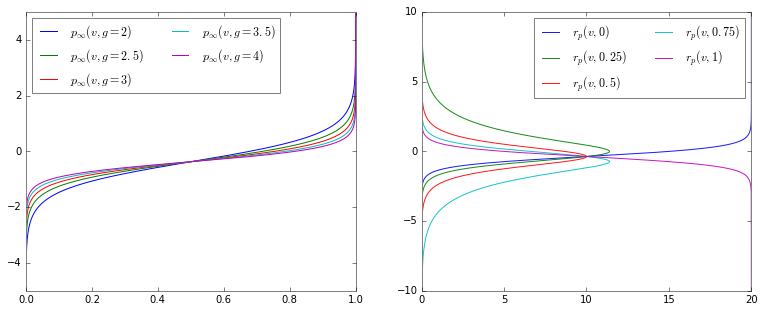

In [123]:
fTR=gr.figure(figsize=(13,5))
gr.ioff(); rows=1; cols=2; ax=list(); 
ax.append(fTR.add_subplot(rows,cols,1))
ax.append(fTR.add_subplot(rows,cols,2))
bias=sc.arange(0,1.01,0.25)
gains=sc.arange(2,5,0.5)
for n in sc.arange(len(bias)):
    p["gainP"]=gains[n]
    ax[0].plot(ssP(ssV,p),ssV,lw=1,label=r'$p_{\infty}(v,g=%g)$'%(p["gainP"]))
for n in sc.arange(len(bias)):
    p["gainP"]=3.0
    p["biasP"]=bias[n]
    ax[1].plot(1/rateP(ssV,p),ssV,lw=1,alpha=0.9,label=r'$r_p(v,%g)$'%(p["biasP"]))
ax[0].legend(loc="upper left", ncol=2); ax[1].legend(loc="upper right", ncol=2)
ax[0].set_ylim(-5,5); ax[1].set_ylim(-10,10)
gr.ion(); gr.ioff()

The behaviour of the time constant that may be a better fit for the probability of release seems to be the one for ...

Now define functions to mimmic the voltage fluctuations during an action potential

In [124]:
def alphaFunction(x, A=1.0, tau=1.0, downAccel=1.0):
    """
    alphaFunction creates an alpha function with amplitude A, time constant tau, 
    and downward acceleration downAccel.  
    Example:
    alphaFunction(x, A=1.0, tau=1.0, downAccel=1.0)
    """
    aa= sc.int32(x>0)
    xovertau = x/tau
    return A* xovertau * sc.exp( downAccel*(1 - xovertau))

def trainAlpha(samplingTimes, pulseTimes, tauTrain=1.0,downAccel=1.0):
    """
    Example:
    a= trainAlpha(samplingTimes, pulseTimes, tauTrain=1.0,downAccel=1.0)
    """
    nPts= len(samplingTimes)
    train = sc.zeros(nPts)
    alpha=alphaFunction(samplingTimes,A=1.0,tau=tauTrain,downAccel=downAccel)
    for n in range(len(pulseTimes)):
        #nn=gr.find(samplingTimes<pulseTimes[n]).max()
        nn=sc.where(samplingTimes<pulseTimes[n])[0].max()
        train[nn:] = train[nn:] + alpha[0: nPts-nn]
    return train


The dynamics for the probability of release are given by functions of the form 

In [ ]:
def STSP1(U,t,par):
    #dp = (p ** par["expP"]) * (ssP(y,par) - p ) * rateP(y,par)
    dp = -(p ** par["expP"]) * p * rateP(uu,par) + (par["ssMaxP"] - p)* ssP(uu,par)
    return dU


The normalized quanta release coupled with the probability of release is

In [127]:
def STSP2D(U,t,par,y):
    p,q,Q=U
    uu= y(t)
    #dp = (p ** par["expP"]) * (ssP(uu,par) - p) * rateP(uu,par)
    dp = -(p ** par["expP"]) * p * rateP(uu,par) + (par["ssMaxP"] - p)* ssP(uu,par)
    #dq = (q ** par["expQ"]) * (par["ssQ"] - q * (1+p) ) * par["rateQ"] 
    dq = (q ** par["expQ"]) * (par["ssQ"] - q) * par["rateQ"] - p * q
    dQ = p*dq + q*dp
    return dp,dq,dQ

Create a function to model the dynamics of the $(p,q)$ system 

In [128]:
def dynamicSTSP(p, ax, ic=[0.2,0.9,0.18], timeMax=600.0, vT=26.7, pulses=100+sc.arange(0,500,50.0),stri=""):
    sampTimes=sc.arange(0,timeMax,p["timeStep"])
    yy= trainAlpha(samplingTimes=sampTimes, pulseTimes=pulses, tauTrain=1.0,downAccel=1.0) 
    y = lambda t: 3*sc.interp(t, sampTimes,yy) - 60.0/vT
    orbits= sc.integrate.odeint(STSP2D, ic, sampTimes, args=(p,y)).transpose()
    pOrbit=orbits[0]; qOrbit=orbits[1]; QOrbit=orbits[2]
    #
    ax[0].plot(sampTimes, (yy-yy.min())/(yy.max()-yy.min()),'k',alpha=0.3)
    ax[0].plot(sampTimes, pOrbit,'r',label=r"$p(t)$")
    ax[0].plot(sampTimes, qOrbit,'b',label=r"$q(t)$")
    ax[0].plot(sampTimes, pOrbit*qOrbit,'g', alpha=1,label=r"$pq$")
    ax[0].plot(sampTimes, QOrbit,'k', lw=4,alpha=0.3, label=r"$pq$")
    ax[1].plot(pOrbit, qOrbit,'b', label=r"$(p,q)$")
    ax[1].plot(pOrbit, pOrbit*qOrbit, 'k', label=r"$(p,qp)$")
    ax[0].legend(ncol=1,fontsize=10,loc="upper right")
    ax[1].legend(ncol=1,fontsize=10,loc="upper right")
    ax[0].text(10,0.2,r"$\omega$=%g Hz"%(p["stimFreq"]))
    ax[0].text(10,0.4,stri)
    ax[0].set_ylim(0,1); ax[1].set_ylim(0,1)
    ax[1].set_xlim(0,1)
    return orbits

### Behaviour with respect to the change in different parameters

Let us first create a function that takes a parameter and different values for the parameter to obtain solutions for the STSP system under consideration. 

In [ ]:
def parameterVariationSTSP(p,parName,parValues):
    orbits=list()
    for aa in parValues:
        p[parName]= aa
        ooo= sc.integrate.odeint(p["rhs"],p["ic"], p["sampTimes"], args=(p,y)).transpose()
        orbits.append(ooo)
    return orbits

Facilitation to depression based on the steepness of the threshold for the probability of release. 

In [ ]:
p={"gainP":3.0,"vHalfP":10.0, "biasP":1.0, "rateP":1/100.0, "expP":0.0,"ssMaxP":0.5,"jumpP":0.5,
    "ssQ": 0.9, "rateQ": 1/1.0, "expQ":1.0,
    "stimFreq": 20.0, "timeStep":0.01}
p["yHalfP"]= p["vHalfP"]/26.7
p["ic"]=[0.2,0.9,0.18]

10


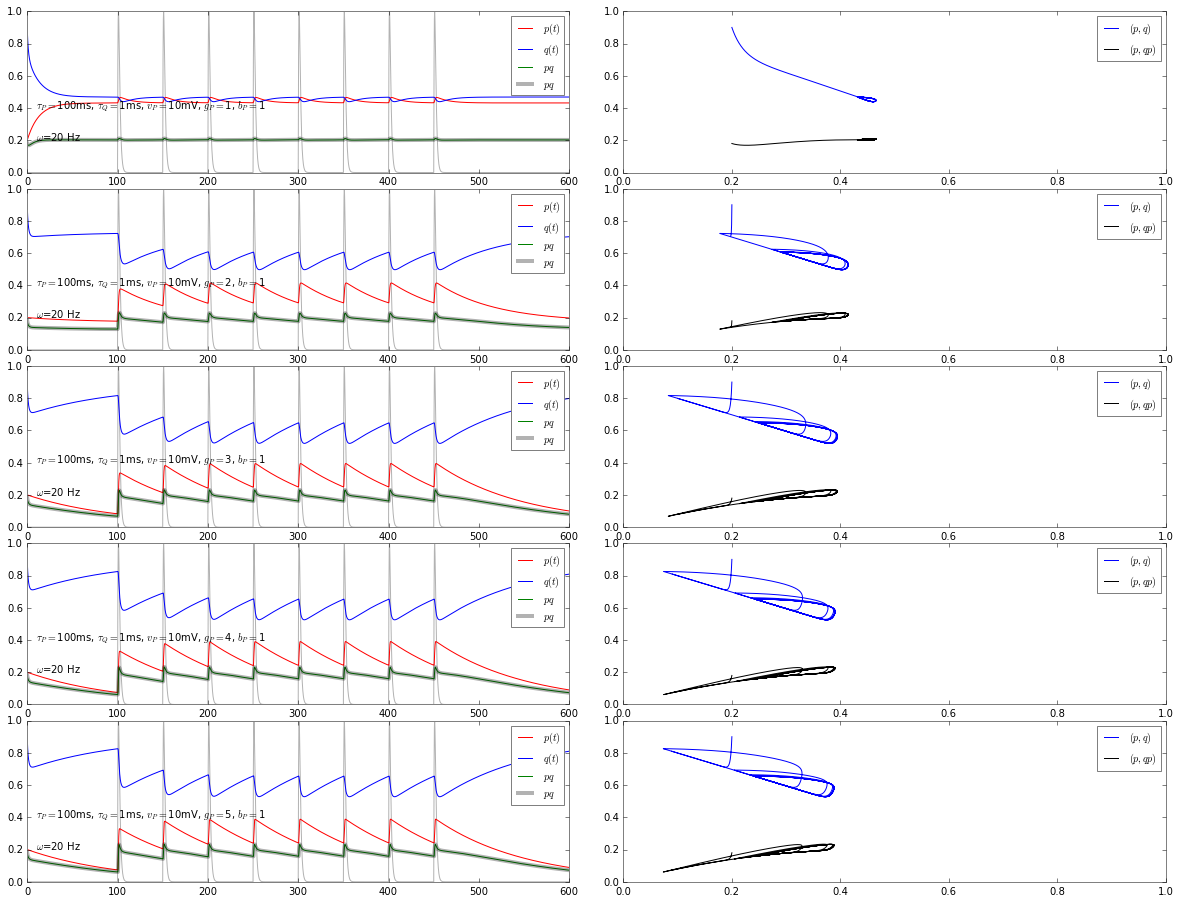

In [136]:
# -----------------------------------------------------------------
# Facilitation to depression based on the steepness of the threshold for the probability of release
# -----------------------------------------------------------------
gs=sc.arange(1,5.01,1)
ax=list(); orbits=list(); nSims = len(gs)
fig=gr.figure(figsize=(17,13)); gr.ioff()
rows=nSims; cols=2
for n in sc.arange(nSims*cols):
    ax.append(fig.add_subplot(rows,cols,n+1))

for n in sc.arange(nSims):
    p["gainP"]= gs[n]
    str0=r"$\tau_P=$%gms, $\tau_Q=$%gms, $v_P=$%gmV, $g_P=$%g, $b_P=$%g"%(1/p["rateP"],1/p["rateQ"],p["vHalfP"],p["gainP"],p["biasP"])
    a=2*n; ll= ax[a:a+2]
    oo=dynamicSTSP(p,ax[a:a+2], ic=p["ic"],timeMax=600.0, vT=26.7, pulses=100+sc.arange(0,400,1000/p["stimFreq"]),stri=str0)
    orbits.append(oo)
gr.ion(); gr.draw()
fig.subplots_adjust(bottom=0.05, left=0.05, top=0.98, right=0.98, hspace=0.1, wspace=0.1)
figName="stspFigures/stsp_%gHz_tauP%gms_tauQ%gms_vP%gmV_gP%g.png"%(p["stimFreq"], 1/p["rateP"], 1/p["rateQ"],p["vHalfP"],p["gainP"])
fig.savefig(figName)

Facilitation to depression based on the rate of recovery of the readily releasable pool


0


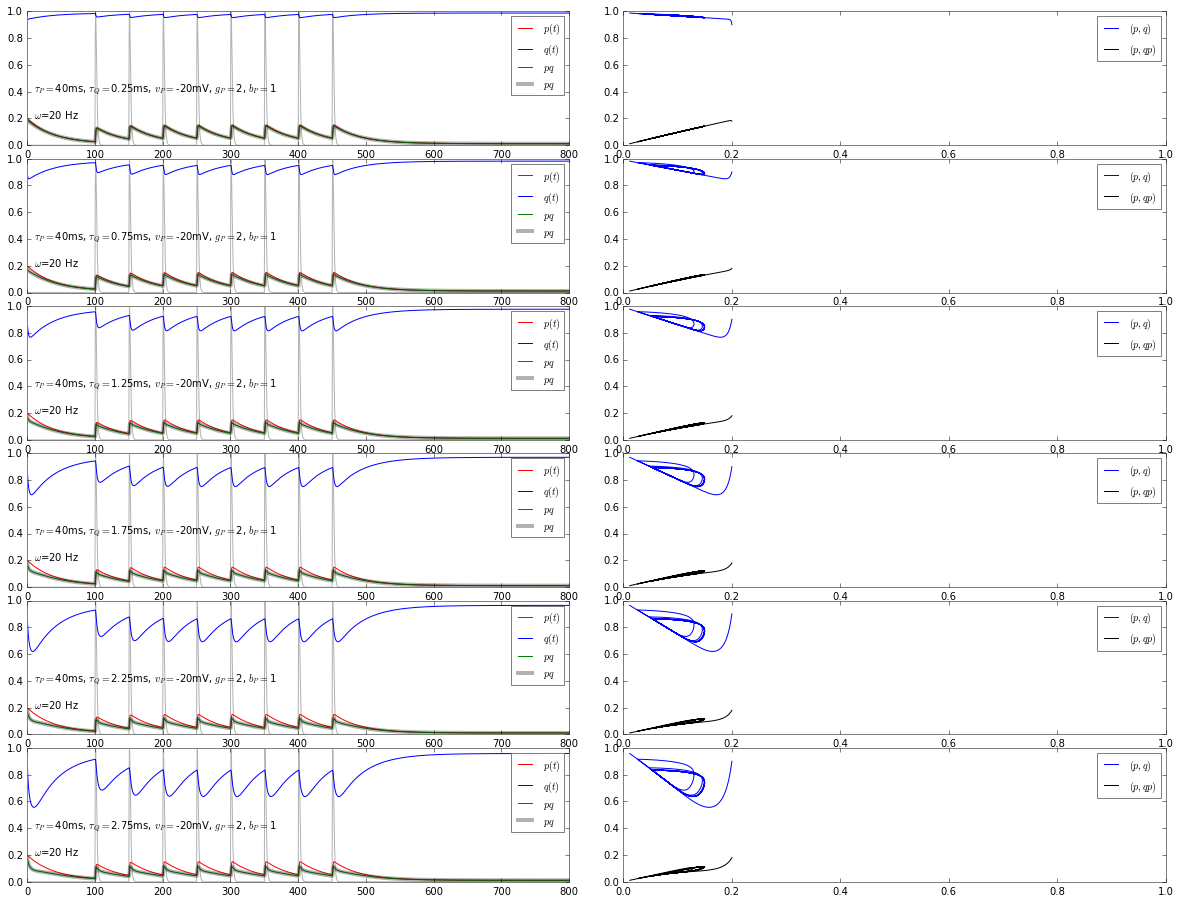

In [104]:
# -----------------------------------------------------------------
# Facilitation to depression based on the rate of recovery of the readily releasable pool
# Soft spots for switching
# -----------------------------------------------------------------
p={"gainP":3.0,"vHalfP":-10.0, "biasP":1.0, "rateP":1/20.0, "expP":0.0,"ssMaxP":0.5,"jumpP":0.5,
    "ssQ": 0.99, "rateQ": 1/1.0, "expQ":1.0,
    "stimFreq": 20.0, "timeStep":0.01}
p["yHalfP"]= p["vHalfP"]/26.7
p["ic"]=[0.2,0.9,0.18]
orbits=list(); ax=list()
rQs= 1/sc.arange(0.25,3.01,0.5)
nSims= len(rQs)
fig=gr.figure(figsize=(17,13)); gr.ioff()
rows=nSims; cols=2;
print(len(ax))
p["vHalfP"]= -20.0
p["gainP"]= 2.0
p["rateP"]= 1/40.0
for n in sc.arange(nSims):
    ax.append(fig.add_subplot(rows,cols,2*n+1))
    ax.append(fig.add_subplot(rows,cols,2*n+2))
    p["rateQ"]= rQs[n]
    str0=r"$\tau_P=$%gms, $\tau_Q=$%gms, $v_P=$%gmV, $g_P=$%g, $b_P=$%g"%(1/p["rateP"],1/p["rateQ"],p["vHalfP"],p["gainP"],p["biasP"])
    a=2*n; ll= ax[a:a+2]
    oo=dynamicSTSP(p,ax[a:a+2], ic=p["ic"],timeMax=800.0, vT=26.7, pulses=100+sc.arange(0,400,1000/p["stimFreq"]),stri=str0)
    orbits.append(oo)
gr.ion(); gr.draw()
fig.subplots_adjust(bottom=0.05, left=0.05, top=0.98, right=0.98, hspace=0.1, wspace=0.1)
fig.savefig("stspFigures/stsp_%gHz_tauP%gms_tauQ%gms_vP%gmV_gP%g.png"%(p["stimFreq"], 1/p["rateP"], 1/p["rateQ"],p["vHalfP"],p["gainP"]))


14


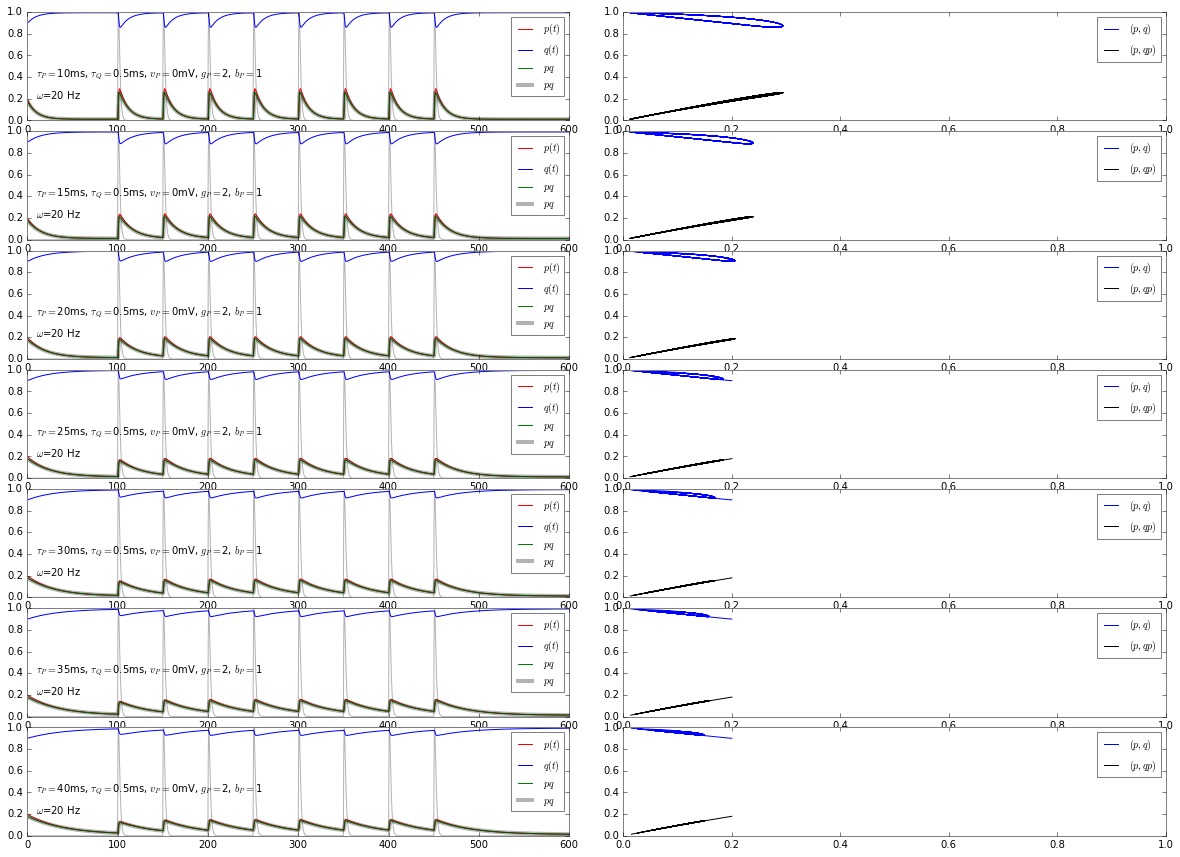

In [105]:
# -----------------------------------------------------------------
# Facilitation to depression based on the rate of decay of the probability of release
# -----------------------------------------------------------------
p={"gainP":3.0,"vHalfP":-10.0, "biasP":1.0, "rateP":1/20.0, "expP":0.0,"ssMaxP":0.5,
    "ssQ": 1.0, "rateQ": 1/1.0, "expQ":1.0,
    "stimFreq": 20.0, "timeStep":0.005}
p["yHalfP"]= p["vHalfP"]/26.7
p["ic"]=[0.2,0.9,0.18]
orbits=list(); ax=list()
rPs= 1/sc.arange(10,40.01,5.0)
nSims= len(rPs)
fig=gr.figure(figsize=(17,13)); gr.ioff()
rows=nSims; cols=2
for n in sc.arange(nSims*cols):
    ax.append(fig.add_subplot(rows,cols,n+1))
print(len(ax))
p["vHalfP"]= 0.0
p["gainP"]= 2.0
p["rateQ"]= 1/0.5
for n in sc.arange(nSims):
    p["rateP"]= rPs[n]
    str0=r"$\tau_P=$%gms, $\tau_Q=$%gms, $v_P=$%gmV, $g_P=$%g, $b_P=$%g"%(1/p["rateP"],1/p["rateQ"],p["vHalfP"],p["gainP"],p["biasP"])
    a=2*n; ll= ax[a:a+2]
    oo=dynamicSTSP(p,ax[a:a+2],ic=p["ic"], timeMax=600.0, vT=26.7, pulses=100+sc.arange(0,400,1000/p["stimFreq"]),stri=str0)
    orbits.append(oo)
gr.ion(); gr.draw()
fig.subplots_adjust(bottom=0.1, left=0.05, top=0.98, right=0.98, hspace=0.1, wspace=0.1)
fig.savefig("stspFigures/stsp_%gHz_tauP%gms_tauQ%gms_vP%gmV_gP%g.png"%(p["stimFreq"], 1/p["rateP"], 1/p["rateQ"],p["vHalfP"],p["gainP"]))



10


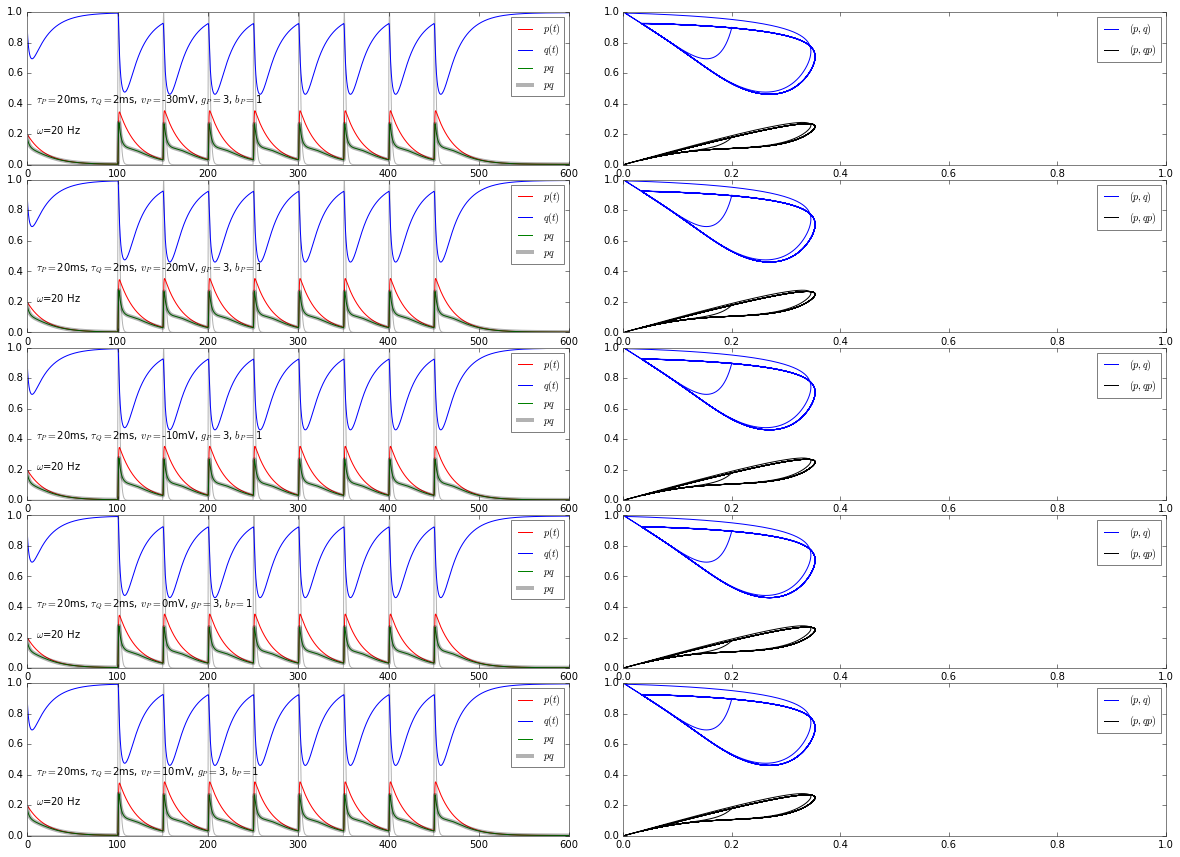

In [106]:
# -----------------------------------------------------------------
# Facilitation to depression based on the rate of recovery of the readily releasable pool
# -----------------------------------------------------------------
p={"gainP":3.0,"vHalfP":-10.0, "biasP":1.0, "rateP":1/20.0, "expP":0.0,"ssMaxP":0.5,
    "ssQ": 1.0, "rateQ": 1/1.0, "expQ":1.0,
    "stimFreq": 20.0, "timeStep":0.01}
p["yHalfP"]= p["vHalfP"]/26.7
p["ic"]=[0.2,0.9,0.18]
orbits=list(); ax=list()
vHPs= sc.arange(-30,10.1,10.0)
nSims= len(vHPs)
fig=gr.figure(figsize=(17,13)); gr.ioff()
rows=nSims; cols=2
for n in sc.arange(nSims*cols):
    ax.append(fig.add_subplot(rows,cols,n+1))
print(len(ax))

p["rateP"]= 1/20.0
p["rateQ"]= 1/2.0
for n in sc.arange(nSims):
    p["vHalfP"]= vHPs[n]
    str0=r"$\tau_P=$%gms, $\tau_Q=$%gms, $v_P=$%gmV, $g_P=$%g, $b_P=$%g"%(1/p["rateP"],1/p["rateQ"],p["vHalfP"],p["gainP"],p["biasP"])
    a=2*n; ll= ax[a:a+2]
    oo=dynamicSTSP(p,ax[a:a+2],ic=p["ic"], timeMax=600.0, vT=26.7, pulses=100+sc.arange(0,400,1000/p["stimFreq"]),stri=str0)
    orbits.append(oo)
gr.ion(); gr.draw()
fig.subplots_adjust(bottom=0.1, left=0.05, top=0.98, right=0.98, hspace=0.1, wspace=0.1)
fig.savefig("stspFigures/stsp_%gHz_tauP%gms_tauQ%gms_vP%gmV_gP%g.png"%(p["stimFreq"], 1/p["rateP"], 1/p["rateQ"],p["vHalfP"],p["gainP"]))


12


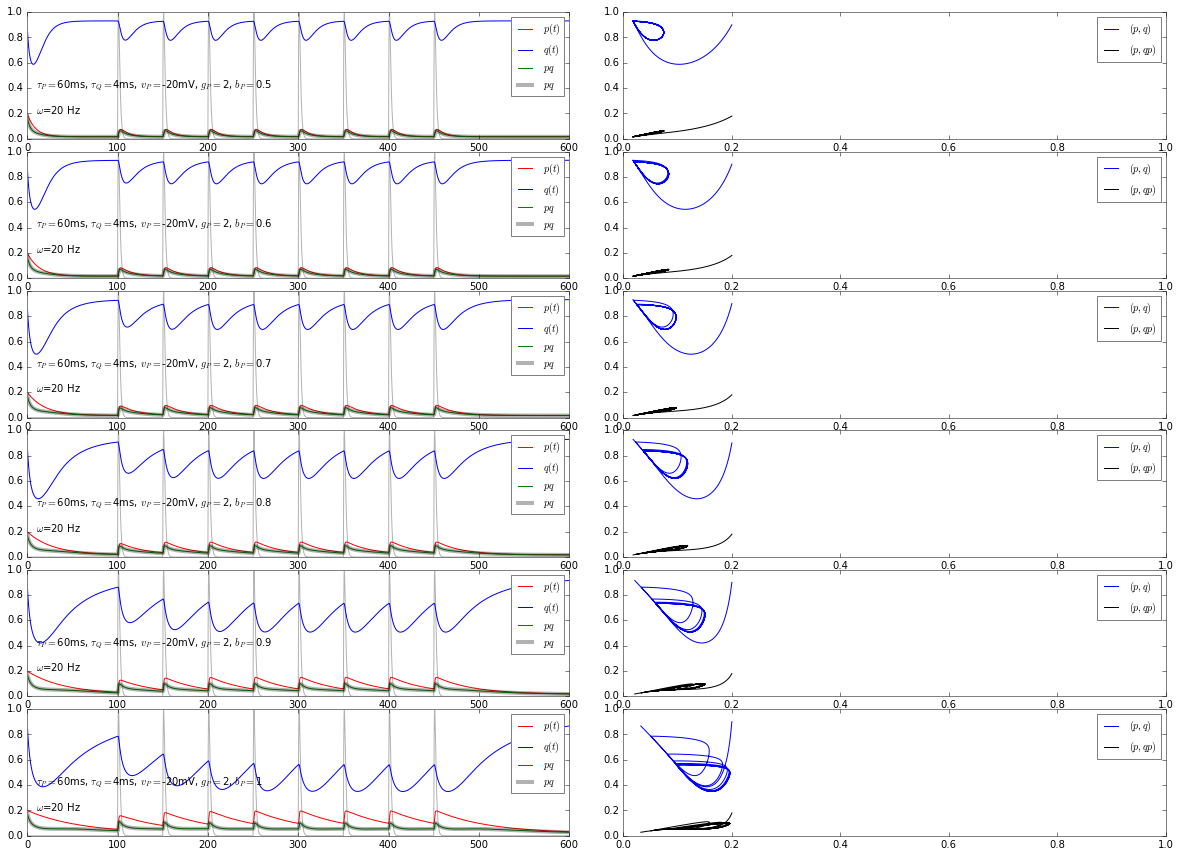

In [109]:
# -----------------------------------------------------------------
p={"gainP":3.0,"vHalfP":-10.0, "biasP":1.0, "rateP":1/50.0, "expP":0.0,"ssMaxP":0.75,
    "ssQ": 1.0, "rateQ": 1/1.0, "expQ":1.0,
    "stimFreq": 20.0, "timeStep":0.005}
p["yHalfP"]= p["vHalfP"]/26.7
p["ic"]=[0.2,0.9,0.18]
orbits=list(); ax=list()
b= sc.arange(0.5,1.01,0.1)
nSims= len(b)
fig=gr.figure(figsize=(17,13)); gr.ioff()
rows=nSims; cols=2
for n in sc.arange(nSims*cols):
    ax.append(fig.add_subplot(rows,cols,n+1))
print(len(ax))
p["vHalfP"]= -20.0
p["gainP"]= 2.0
p["rateQ"]= 1/4.0
p["rateP"]= 1/60.0
for n in sc.arange(nSims):
    p["biasP"]= b[n]
    str0=r"$\tau_P=$%gms, $\tau_Q=$%gms, $v_P=$%gmV, $g_P=$%g, $b_P=$%g"%(1/p["rateP"],1/p["rateQ"],p["vHalfP"],p["gainP"],p["biasP"])
    a=2*n; ll= ax[a:a+2]
    oo=dynamicSTSP(p,ax[a:a+2],ic=p["ic"], timeMax=600.0, vT=26.7, pulses=100+sc.arange(0,400,1000/p["stimFreq"]),stri=str0)
    orbits.append(oo)
gr.ion(); gr.draw()
fig.subplots_adjust(bottom=0.1, left=0.05, top=0.98, right=0.98, hspace=0.1, wspace=0.1)
fig.savefig("stspFigures/stsp_%gHz_tauP%gms_tauQ%gms_vP%gmV_gP%g.png"%(p["stimFreq"], 1/p["rateP"], 1/p["rateQ"],p["vHalfP"],p["gainP"]))

